In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
from matplotlib import colors

In [127]:
#konwerter: nie trzeba implementować samemu, można wykorzystać funkcję z bilbioteki
def hsv2rgb(h, s, v):
    return colors.hsv_to_rgb(np.array([h, s, v])/255)

# poniżej znajdują się funkcje modelujące kolejne gradienty z zadania.
# v to pozycja na osi ox: v jest od 0 do 1. Zewnetrzna funkcja wywołuje te metody podając
# różne v i oczekując trójki RGB bądź HSV reprezentującej kolor. Np. (0,0,0) w RGB to kolor czarny. 
# Należy uwikłać v w funkcję modelującą kolor. W tym celu dla kolejnych gradientów trzeba przyjąć 
# sobie jakieś punkty charakterystyczne,
# np. widzimy, że po lewej stronie (dla v = 0) powinien być kolor zielony a w środku niebieski (dla v = 0.5),
# a wszystkie punkty pomiędzy należy interpolować liniowo (proporcjonalnie). 

def gradient_rgb_bw(v):
    return (v, v, v)


def gradient_rgb_gbr(v):
    # (0, 1, 0) -> (0, 0, 1) -> (1, 0, 0)
    red = 0
    green = 0
    blue = 0
    if v < 0.5:
        green = 1-2*v
        blue = 2*v
    else:
        blue = 2*(1-v)
        red = 2*(v-0.5)
    return (red, green, blue)


def gradient_rgb_gbr_full(v):
    # (0, 1, 0) -> (0, 1, 1) -> (0, 0, 1) -> (1, 0, 1) -> (1, 0, 0)
    red = 0
    green = 0
    blue = 0
    if v < 0.25:
        green = 1
        blue = 4*v
    elif v < 0.5:
        blue = 1
        green = 1-4*(v-0.25)
    elif v < 0.75:
        blue = 1
        red = 4*(v-0.5)
    else:
        red = 1
        blue = 1 - 4*(v-0.75)
    
    return (red, green, blue)


def gradient_rgb_wb_custom(v):
    #TODO
    return (0, 0, 0)


def gradient_hsv_bw(v):
    #TODO
    return hsv2rgb(0, 0, 0)


def gradient_hsv_gbr(v):
    #TODO
    return hsv2rgb(0, 0, 0)

def gradient_hsv_unknown(v):
    #TODO
    return hsv2rgb(0, 0, 0)


def gradient_hsv_custom(v):
    #TODO
    return hsv2rgb(0, 0, 0)

In [128]:
def plot_color_gradients(gradients, names):
    # For pretty latex fonts (commented out, because it does not work on some machines)
    #rc('text', usetex=True) 
    #rc('font', family='serif', serif=['Times'], size=10)
    rc('legend', fontsize=10)

    column_width_pt = 400         # Show in latex using \the\linewidth
    pt_per_inch = 72
    size = column_width_pt / pt_per_inch

    fig, axes = plt.subplots(nrows=len(gradients), sharex=True, figsize=(size, 0.75 * size))
    fig.subplots_adjust(top=1.00, bottom=0.05, left=0.25, right=0.95)


    for ax, gradient, name in zip(axes, gradients, names):
        # Create image with two lines and draw gradient on it
        img = np.zeros((2, 1024, 3))
        for i, v in enumerate(np.linspace(0, 1, 1024)):
            img[:, i] = gradient(v)

        im = ax.imshow(img, aspect='auto')
        im.set_extent([0, 1, 0, 1])
        ax.yaxis.set_visible(False)

        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.25
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='left', fontsize=10)

    fig.savefig('my-gradients.pdf')

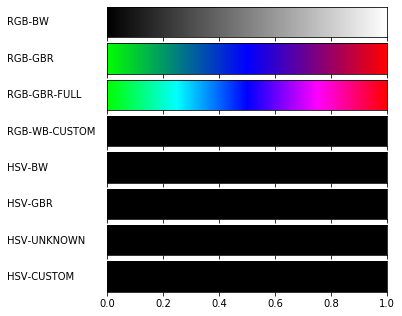

In [129]:
def toname(g):
    return g.__name__.replace('gradient_', '').replace('_', '-').upper()
    
gradients = (gradient_rgb_bw, gradient_rgb_gbr, gradient_rgb_gbr_full, gradient_rgb_wb_custom,
                 gradient_hsv_bw, gradient_hsv_gbr, gradient_hsv_unknown, gradient_hsv_custom)

plot_color_gradients(gradients, [toname(g) for g in gradients])